In [47]:
import pandas as pd

df = pd.read_json("../../data/example00593.json", orient='series')
df = df.set_index('date')
s_data = df.copy()

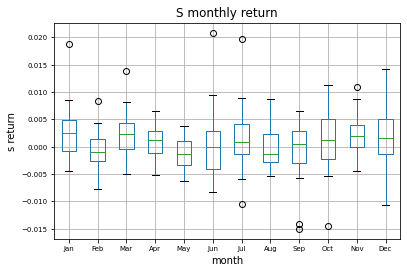

In [66]:
import matplotlib.pyplot as plt


s_monthly_return = s_data['close'].pct_change().groupby([s_data['close'].index.year, s_data['close'].index.month]).mean()
s_monthly_return_list = []

for result in s_monthly_return.items():
    s_monthly_return_list.append({'month':result[0][1],'monthly_return': result[1]})
s_monthly_return_list = pd.DataFrame(s_monthly_return_list, columns=('month', 'monthly_return'))
s_monthly_return_list.boxplot(column='monthly_return', by='month')

ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_ylabel('s return')
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title('S monthly return')
plt.suptitle("")
plt.show()

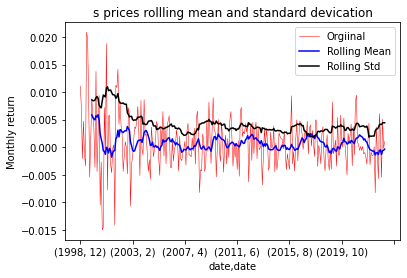

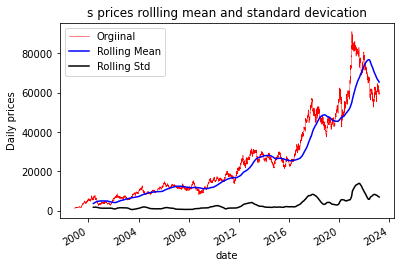

In [69]:
def plot_rolling_statistics_ts(ts, titletext, ytext, window_size=12):
    ts.plot(color='red', label='Orgiinal', lw=0.5)
    ts.rolling(window_size).mean().plot(color='blue', label='Rolling Mean')
    ts.rolling(window_size).std().plot(color='black', label='Rolling Std')
    
    plt.legend(loc='best')
    plt.ylabel(ytext)
    plt.title(titletext)
    plt.show(block=False)
    
plot_rolling_statistics_ts(s_monthly_return[1:], 's prices rollling mean and standard devication', 'Monthly return')
plot_rolling_statistics_ts(s_data['close'], 's prices rollling mean and standard devication', 'Daily prices', 365)


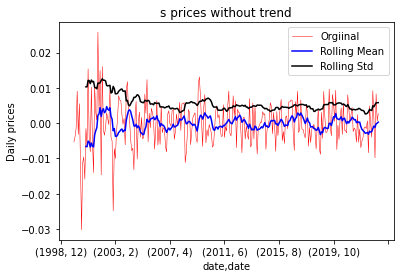

In [90]:
import statistics as stats

# time_period = 20
# history = []
# close = s_data['close']
# for close_price in close:
#     history.append(close_price)
#     if len(history) > time_period:
#         del(history[0])
#     history.append(close_price - stats.mean(history))

# s_data = s_data.assign(season_diff=pd.Series(history, index=s_data. ))

# print(s_data['season_diff'])
plot_rolling_statistics_ts(s_monthly_return[1:].diff(12), 's prices without trend', 'Daily prices')


In [83]:
from statsmodels.tsa.stattools import adfuller
    
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[1:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '시차사용', '사용된 관찰 수'])
    print(dfoutput)

test_stationarity(s_data['close'])

Results of Dickey-Fuller Test:
Test Statistic      -0.485604
p-value              0.894795
시차사용                32.000000
사용된 관찰 수          5966.000000
dtype: float64


In [84]:
test_stationarity(s_monthly_return[1:])

Results of Dickey-Fuller Test:
Test Statistic   -6.340981e+00
p-value           2.755224e-08
시차사용              1.300000e+01
사용된 관찰 수          2.770000e+02
dtype: float64


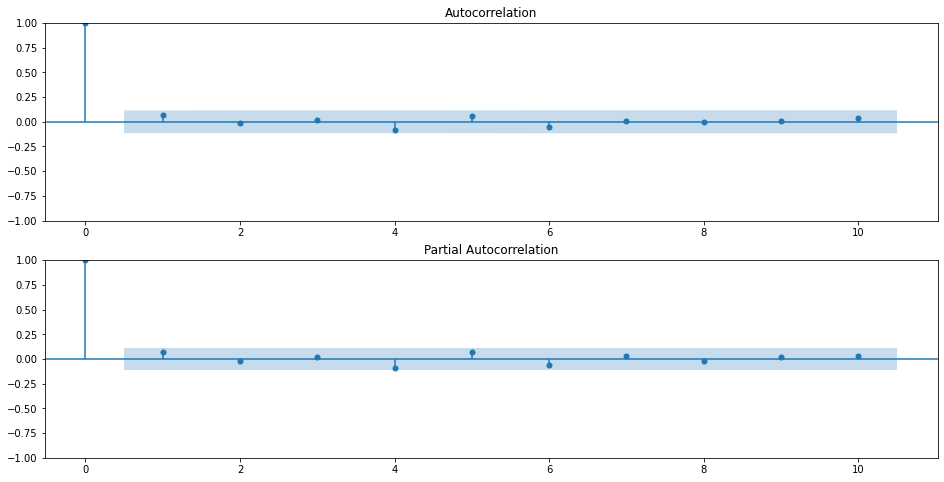

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from matplotlib import pyplot

pyplot.figure(figsize=(16, 8))
pyplot.subplot(211)
plot_acf(s_monthly_return[1:], ax=pyplot.gca(), lags=10)

pyplot.subplot(212)
plot_pacf(s_monthly_return[1:], ax=pyplot.gca(), lags=10)

pyplot.show()

C:\Users\samdasu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samdasu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samdasu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samdasu\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\s

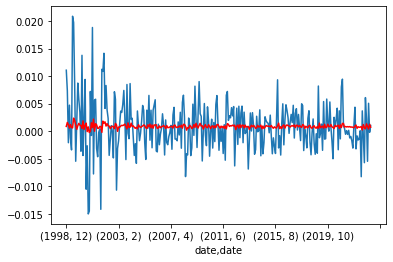

In [95]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(s_monthly_return[1:], order=(2, 0, 2))

fitted_results = model.fit()

s_monthly_return[1:].plot()

fitted_results.fittedvalues.plot(color='red')

plt.show()